In [1]:
import pandas as pd
import numpy as np
import sklearn

from time import time

from sklearn import metrics
from sklearn.metrics import silhouette_score as sil_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import plot_confusion_matrix, classification_report


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = "D:\Github\ML\ionosphere\ionosphere.data"
df_ion = pd.read_csv(file_path, delimiter = ',')
df_ion.columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10","V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20","V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29", "V30","V31", "V32", "V33","V34","Class"]
df_ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [3]:
df_ion['Class'] = df_ion['Class'].map({'g': 0, 'b': 1})
df_ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,1


In [4]:
#check if there is duplicated values
df_ion[df_ion.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
247,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
#drop duplicte value
df_ion.drop_duplicates(keep='last',inplace=True)

In [6]:
#statistics of the data
df_ion.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,349.000000,349.0,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.893983,0.0,0.642165,0.044795,0.602070,0.116487,0.550858,0.121125,0.511916,0.182277,...,-0.070129,0.540702,-0.065748,0.380005,-0.027090,0.353323,-0.002254,0.350832,0.015861,0.358166
std,0.308302,0.0,0.497588,0.442660,0.520181,0.462063,0.492951,0.521523,0.507105,0.485080,...,0.509391,0.517054,0.548928,0.577111,0.509152,0.572799,0.514228,0.523754,0.469009,0.480150
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.473370,-0.066040,0.412870,-0.024940,0.215720,-0.054050,0.087760,-0.049930,...,-0.331450,0.280790,-0.422310,0.000000,-0.236490,0.000000,-0.241800,0.000000,-0.162430,0.000000
50%,1.000000,0.0,0.871110,0.017090,0.809200,0.022800,0.728730,0.015460,0.684210,0.018290,...,-0.015050,0.708240,-0.017680,0.501790,0.000000,0.450980,0.000000,0.416670,0.000000,0.000000
75%,1.000000,0.0,1.000000,0.195270,1.000000,0.335980,0.971650,0.457470,0.951350,0.538190,...,0.159080,0.999890,0.156190,0.885680,0.154360,0.861360,0.201750,0.819790,0.172550,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


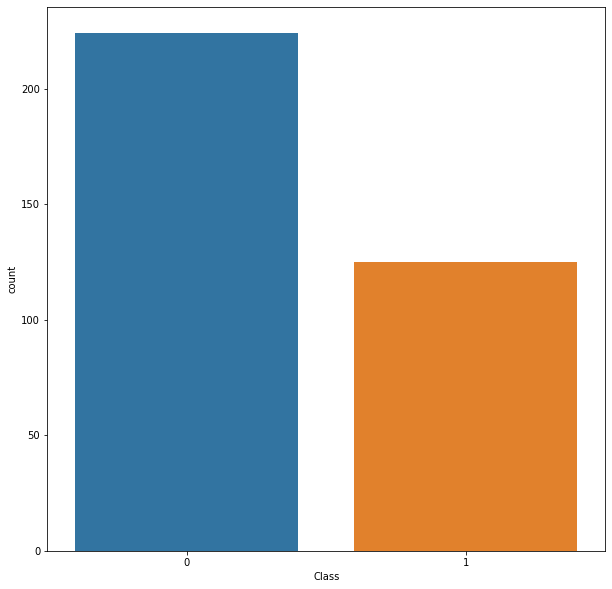

In [7]:
#plot the glass distribution
plt.figure(figsize=(10,10))
sns.countplot(x='Class', data=df_ion, order=df_ion['Class'].value_counts().index);

In [8]:
#create feature and label
#from tensorflow.keras.utils import to_categorical, normalize
X=df_ion.drop('Class',axis=1)
#X=normalize(X)
y=df_ion['Class']

X_scaled = scale(X)

Function

In [9]:
def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)

def print_line(title=None):
    print(80*'-')
    if title:
        print('* ', title, ' *')
        print(80*'-')

Cluster

Help functions

In [10]:
# kmeans plot showing elbow method and silhouette score
def kmeans_plot(dataName, data):
    sse = []
    scores = []
    for i in range(2,15):
        kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        
        kmeans_labels = kmeans.predict(data)
        scores.append(sil_score(data, kmeans_labels))
                
    # Plot the data
    title = "K-means of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(211)
    plt.plot(range(2,15),sse, 'x-')
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.grid()
    
    plt.subplot(212)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()
            
def em_plot(dataName, data):
    aic = []
    bic = []
    scores = []
    for i in range(2,15):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        aic.append(gmm.aic(data))
        bic.append(gmm.bic(data))
        
        gmm_labels = gmm.predict(data)
        scores.append(sil_score(data, gmm_labels))
                
    # Plot the data
    title = "Expectation Maximization of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(311)
    plt.plot(range(2,15), aic, 'x-')
    plt.title("AIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('AIC')
    plt.grid()
    
    plt.subplot(312)
    plt.plot(range(2,15), bic, 'x-')
    plt.title("BIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.grid()
    
    plt.subplot(313)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()

K-means of Ionosphere Data

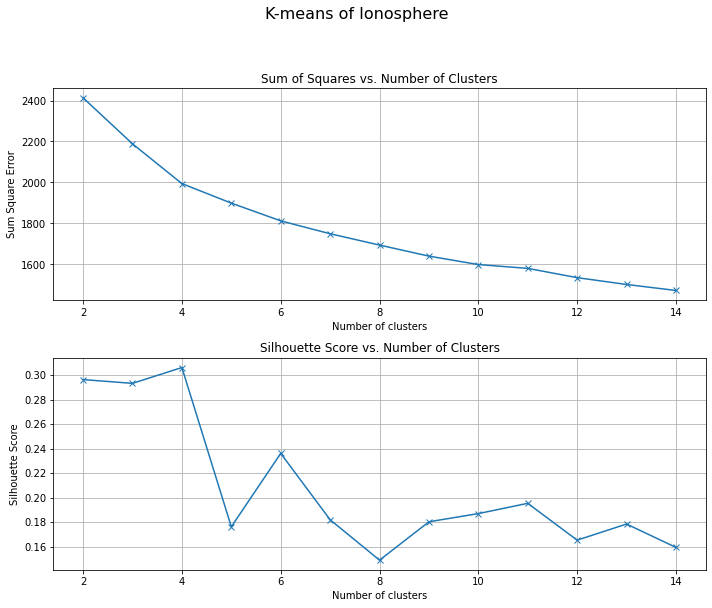

In [11]:
kmeans_plot('Ionosphere', X)

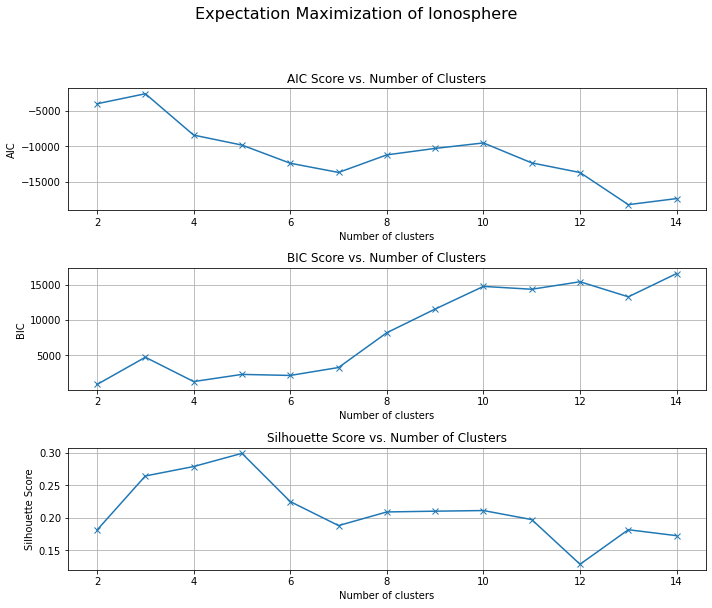

In [12]:
em_plot('Ionosphere', X)

Part II: Dimension Reduction

Helper Function

In [13]:
# Dimensionality reduction imports
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.linalg import pinv
from scipy.stats import kurtosis
from scipy import sparse 


# borrowed from https://github.com/JonathanTay/CS-7641-assignment-3/
def reconstruction_error(algo, data):
    W = algo.components_
    if sparse.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p @ W) @ (data.T)).T
    errors = np.square(data - reconstructed)
    return np.nanmean(errors)

#
# PCA
#

def calc_pca_components(data, dataName):
    t0 = time()
    
    pca = PCA(n_components=data.shape[1], random_state=0)
    pca.fit(data)
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    
    end = time() - t0
    
    plt.title('PCA Analysis for %s' % dataName)
    plt.ylabel('Cumulative % Variance')
    plt.xlabel('Number of Features')
    plt.axhline(y=95, color='gray', linestyle='--', label='95% Variance')
    plt.plot(range(1,data.shape[1]+1), var)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    numComponents = np.argmax(var>95) + 1
    
    
    print('%s total features: %d' %(dataName, data.shape[1]))
    print('Best Number of PCA Components: %d' % numComponents)
    print('Total Time: %.3f seconds' % end)
    
    
#
# ICA
#
def calc_ica_components(data, dataName):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    for dim in range(2,dimensions):
        ica = FastICA(n_components=dim, max_iter=600, random_state=0)
        res = ica.fit_transform(data)
        tmp = pd.DataFrame(res)
        k   = tmp.kurt(axis=0)
        kurtosis.append(k.abs().mean())
        
    end = time() - t0
    
    optimalComponents = np.argmax(kurtosis)
    
    plt.title('ICA Analysis for %s' % dataName)
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of ICA Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# RP
#
def calc_rp_components(data, dataName, tries=100):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    stddev_kurtosis = []
    lowerbound = []
    upperbound = []
    for dim in range(2,dimensions):
        kurts = []
        for t in range(tries):
            rp = RP(n_components=dim)
            res = rp.fit_transform(data)
            tmp = pd.DataFrame(res)
            k   = tmp.kurt(axis=0)
            kurts.append(k.abs().mean())
        kurtosis.append(np.mean(kurts))
        lowerbound.append(np.mean(kurts)-np.std(kurts))
        upperbound.append(np.mean(kurts)+np.std(kurts))
        
    optimalComponents = np.argmax(kurtosis)
    
    end = time() - t0
    
    plt.title('RP Analysis for %s: %d Iterations' % (dataName, tries))
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.fill_between(range(2, dimensions), lowerbound, upperbound, facecolor='gray', alpha=0.1)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of RP Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# UFS
#
# function based on https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
def calc_kbest(dataX, datay, dataName):
    t0 = time()
    
    kBest = SelectKBest(f_classif, k=4)
    kBest.fit(dataX, datay)
    scores = kBest.pvalues_
    scores[np.isnan(scores)]=0 # get rid of NaN's
    scores += 1e-308           # get rid of zero values
    scores = -np.log10(scores)
    scores /= scores.max()
    
    plt.title('UFS Analysis for %s' % dataName)
    plt.ylabel('Normalized Univariate Score')
    plt.xlabel('Feature Number')
    plt.bar(np.arange(dataX.shape[-1]),scores)
    plt.grid(alpha=0.3)
    plt.show()

    end = time() - t0
    print('Total Time: %.3f seconds' % end)


--------------------------------------------------------------------------------
*  Ionosphere PCA  *
--------------------------------------------------------------------------------


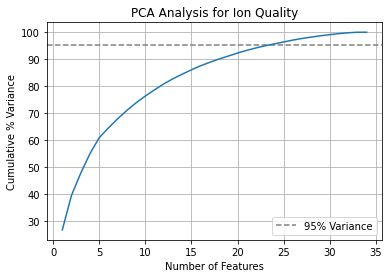

Ion Quality total features: 34
Best Number of PCA Components: 24
Total Time: 0.014 seconds
PCA Reconstruction Error:  1.3166119943467772e-30
--------------------------------------------------------------------------------
*  Ionosphere ICA  *
--------------------------------------------------------------------------------


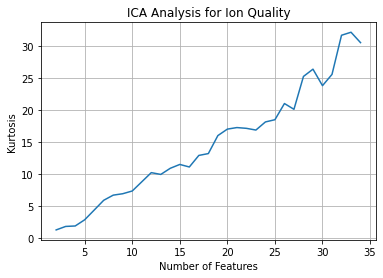

Total Number of Features: 34
Best Number of ICA Components: 33
Total Time: 8.055 seconds
ICA Reconstruction Error:  0.004892438236669945
--------------------------------------------------------------------------------
*  Ionosphere RP  *
--------------------------------------------------------------------------------


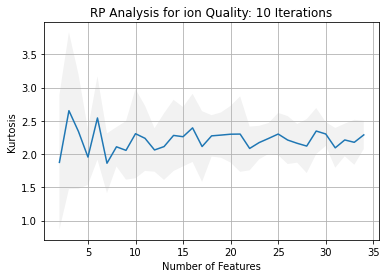

Total Number of Features: 34
Best Number of RP Components: 3
Total Time: 1.383 seconds


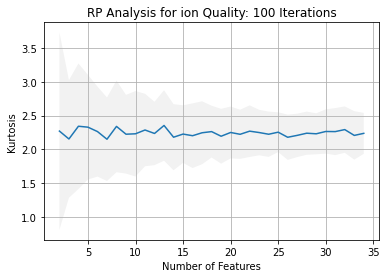

Total Number of Features: 34
Best Number of RP Components: 13
Total Time: 11.894 seconds
ICA Reconstruction Error:  0.5580944898944509
--------------------------------------------------------------------------------
*  Ionosphere UFS  *
--------------------------------------------------------------------------------


C:\Users\shenl\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\shenl\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


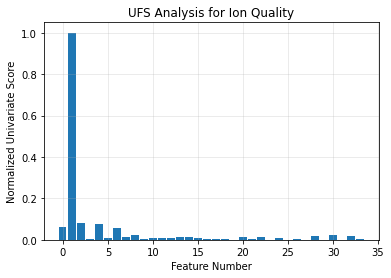

Total Time: 0.550 seconds


In [14]:
#
# PCA
#
print_line('Ionosphere PCA')
Ion_pca_components = calc_pca_components(X_scaled, 'Ion Quality')
ionPCA = PCA(n_components=Ion_pca_components, random_state=0).fit(X_scaled)
ion_pca_sse = reconstruction_error(ionPCA, X_scaled)
print('PCA Reconstruction Error: ', ion_pca_sse)



#
# ICA
#
print_line('Ionosphere ICA')
Ion_ica_components = calc_ica_components(X_scaled, 'Ion Quality')
ionICA = FastICA(n_components=Ion_ica_components, random_state=0).fit(X_scaled)
ion_ica_sse = reconstruction_error(ionICA, X_scaled)
print('ICA Reconstruction Error: ', ion_ica_sse)


#
# RP
#
print_line('Ionosphere RP')
ion_rp_components = calc_rp_components(X_scaled, 'ion Quality', 10)
ion_rp_components = calc_rp_components(X_scaled, 'ion Quality', 100)
ionRP = RP(n_components=ion_rp_components, random_state=0).fit(X_scaled)
ion_rp_sse = reconstruction_error(ionRP, X_scaled)
print('ICA Reconstruction Error: ', ion_rp_sse)


#
# UFS
#
print_line('Ionosphere UFS')
calc_kbest(X_scaled, y, 'Ion Quality')

Helper Function

In [15]:
# Run all kmeans and plot results
def compare_kmeans(dataName, datasets):
    # Loop through all datasets
    all_sse = []
    all_scores = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        sse    = []
        scores = []
        
        # try different cluster sizes
        for i in range(2,15):
            kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
            kmeans.fit(data)
            sse.append(kmeans.inertia_)
            
            kmeans_labels = kmeans.predict(data)
            scores.append(sil_score(data, kmeans_labels))
            
        all_sse.append(sse)
        all_scores.append(scores)
        all_methods.append(d[0])
                    
    # Plot the data
    title = "K-means of " + dataName + " Using Dimensionality Reduction"
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(211)
    for i,sse in enumerate(all_sse):
        plt.plot(range(2,15), sse, lines[i], label=all_methods[i])
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.legend()
    plt.grid()
    
    plt.subplot(212)
    for i, score in enumerate(all_scores):
        plt.plot(range(2,15), score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()

def compare_em(dataName, datasets):
    # Loop through all datasets
    all_aic     = []
    all_bic     = []
    all_scores  = []
    all_dims    = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        dimensions = data.shape[1] + 1
        all_dims.append(list(range(2,dimensions)))
        
        aic    = []
        bic    = []
        scores = []
        
        for i in range(2,dimensions):
            gmm = GaussianMixture(n_components=i, random_state=0)
            gmm.fit(data)
            aic.append(gmm.aic(data))
            bic.append(gmm.bic(data))
        
            gmm_labels = gmm.predict(data)
            scores.append(sil_score(data, gmm_labels))
        
        all_aic.append(aic)
        all_bic.append(bic)
        all_scores.append(scores)
        all_methods.append(d[0])
    
    # Plot the data
    title = "EM of " + dataName + " Using Dimensionality Reduction"
    fig = plt.figure(figsize=(10, 8))
    
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(311)
    for i,aic in enumerate(all_aic):
        plt.plot(all_dims[i], aic, lines[i], label=all_methods[i])
    plt.title("AIC vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplot(312)
    for i,bic in enumerate(all_bic):
        plt.plot(all_dims[i], bic, lines[i], label=all_methods[i])
    plt.title("BIC Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    plt.subplot(313)
    for i,score in enumerate(all_scores):
        plt.plot(all_dims[i], score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
def bench_kmeans(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_, metric='euclidean')))
   
def bench_em(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    gmm_labels = estimator.predict(data)
    print('%-9s\t%.2fs\t%i\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.aic(data), estimator.bic(data),
             metrics.homogeneity_score(labels, gmm_labels),
             metrics.completeness_score(labels, gmm_labels),
             metrics.v_measure_score(labels, gmm_labels),
             metrics.adjusted_rand_score(labels, gmm_labels),
             metrics.adjusted_mutual_info_score(labels,  gmm_labels),
             metrics.silhouette_score(data, gmm_labels, metric='euclidean')))

Wine Data Reduction

In [16]:
# reduce wine data set
ionoPCA = PCA(n_components=9, random_state=0).fit_transform(X_scaled)
ionoICA = FastICA(n_components=8, random_state=0).fit_transform(X_scaled)
ionoRP  = RP(n_components=8, random_state=0).fit_transform(X_scaled)
ionoUFS = SelectKBest(f_classif, k=4).fit_transform(X_scaled, y)

iono_data = []
iono_data.append(['Original', X_scaled])
iono_data.append(['PCA', ionoPCA])
iono_data.append(['ICA', ionoICA])
iono_data.append(['RP',  ionoRP])
iono_data.append(['UFS', ionoUFS])

C:\Users\shenl\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\shenl\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K-means

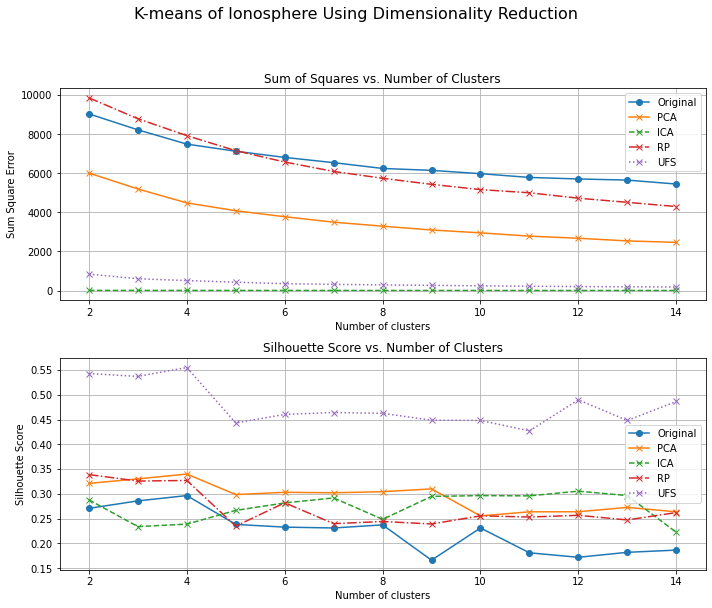

--------------------------------------------------------------------------------
*  K-Means Ionosphere Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.16s	9037	0.126	0.120	0.123	0.165	0.121	0.271
PCA-based	0.07s	6009	0.126	0.120	0.123	0.165	0.121	0.321
ICA-based	0.10s	7	0.131	0.124	0.128	0.170	0.126	0.197
RP-based 	0.06s	9858	0.096	0.091	0.094	0.133	0.092	0.339
UFS-based	0.07s	839	0.293	0.357	0.322	0.400	0.320	0.543


In [17]:
# Create k-means plots
compare_kmeans('Ionosphere', iono_data)

# Create k-means benchmark table
print_line('K-Means Ionosphere Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="Original",  data=X_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="PCA-based", data=ionoPCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="ICA-based", data=ionoICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="RP-based",  data=ionoRP)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=y, name="UFS-based", data=ionoUFS)

Expectation Maximization

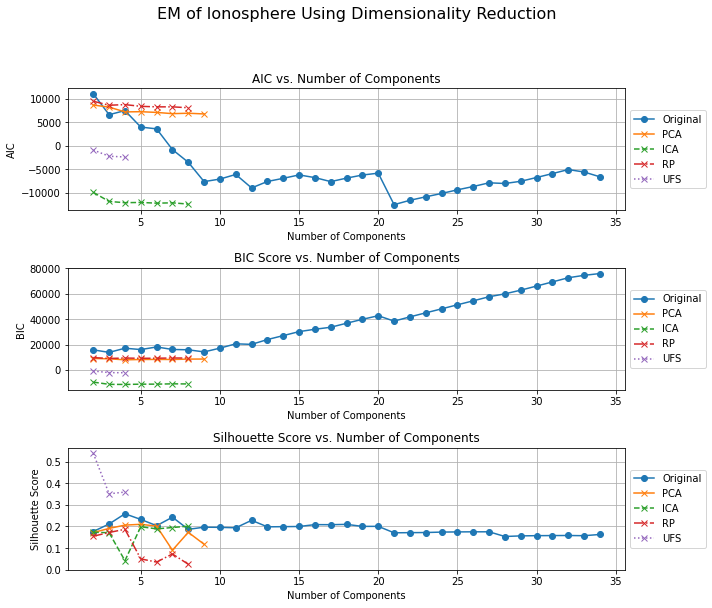

--------------------------------------------------------------------------------
*  EM Ionosphere Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.23s	-3496	15928	0.463	0.179	0.259	0.171	0.252	0.187
PCA-based	0.13s	6906	8598	0.533	0.185	0.275	0.199	0.269	0.173
ICA-based	0.17s	-12357	-10973	0.539	0.205	0.297	0.245	0.291	0.201
RP-based 	0.27s	8070	9454	0.574	0.203	0.299	0.187	0.294	0.025
UFS-based	0.25s	-3298	-2839	0.416	0.182	0.253	0.209	0.245	0.135


In [18]:
# Create k-means plots
compare_em('Ionosphere', iono_data)

# Create k-means benchmark table
print_line('EM Ionosphere Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=8, random_state=0), labels=y, name="Original",  data=X_scaled)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=y, name="PCA-based", data=ionoPCA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=y, name="ICA-based", data=ionoICA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=y, name="RP-based",  data=ionoRP)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=y, name="UFS-based", data=ionoUFS)

Part Four: dimensionality reduction with Neural Networks

Helper function

In [ ]:
# Function based on:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
def plot_learning_curve(clf, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                        clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 20),
                                                        return_times = True,
                                                        random_state = 0)

    # ------------------------------------------------------------------------------------------
    # Plot Learning Curve
    # ------------------------------------------------------------------------------------------
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.figure(1)
    plt.plot(train_sizes, train_mean, '--', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create learning curve plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # ------------------------------------------------------------------------------------------
    # Plot Scalability Curve
    # ------------------------------------------------------------------------------------------
    # Create mean and std of training times
    train_times_mean = np.mean(fit_times, axis=1)
    train_times_std  = np.std(fit_times, axis=1)
    
    # plot lines
    plt.figure(2)
    plt.plot(train_sizes, train_times_mean, 'o-')
    plt.fill_between(train_sizes, train_times_mean - train_times_std, train_times_mean + train_times_std, color='#DDDDDD')
    plt.title('Training Scalability')
    plt.xlabel('Training Set Size')
    plt.ylabel('Fit Times (s)')
    plt.grid()
    plt.show()
    
# Function based on:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion(clf, X_test, y_test, labels):
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        #print(title)
        #print(disp.confusion_matrix)
        plt.show()

    plt.show()
    
    return 0